# Scrapping

## Amazon

In [72]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import csv
from urllib.request import urlopen

In [26]:
# We also can scrap data from urls
with open("amazon_phones.html", "r", encoding="utf-8") as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

product_names = []
prices = []
ratings = []

for product in soup.find_all('div', class_='s-result-item'):
    name = product.find('span', class_='a-text-normal')
    if name:
        product_names.append(name.text)
    else:
        product_names.append("N/A")

    price = product.find('span', class_='a-price')
    if price:
        prices.append(price.find('span', class_='a-offscreen').text)
    else:
        prices.append("N/A")

    rating = product.find('span', class_='a-icon-alt')
    if rating:
        ratings.append(rating.text)
    else:
        ratings.append("N/A")

data = {
    'Product Name': product_names,
    'Price': prices,
    'Ratings': ratings
}
df = pd.DataFrame(data)

csv_file_path = 'amazon-phones-bs4.csv'
df.to_csv(csv_file_path, index=False)


In [104]:
amazon = pd.read_csv('amazon-phones-bs4.csv')
amazon

,Product Name,Price,Ratings
0,NaN,NaN,NaN
1,Motorola Moto G Stylus | 2022 | 2-Day Battery ...,$129.99,4.3 out of 5 stars
2,Motorola Moto G Stylus 5G | 2021 | 2-Day Batte...,$149.99,4.3 out of 5 stars
3,Google Pixel 7a - Unlocked Android Cell Phone ...,$374.00,4.2 out of 5 stars
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,"Apple iPhone 12 Mini, 64GB, Blue - Unlocked (R...",$311.76,4.2 out of 5 stars
7,"SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...",$999.99,4.6 out of 5 stars
8,"SAMSUNG Galaxy A54 5G A Series Cell Phone, Fac...",$399.99,4.3 out of 5 stars
9,AT&T BL102-3 DECT 6.0 3-Handset Cordless Phone...,$86.59,4.3 out of 5 stars


## Mega PK

In [80]:
httpObject = urlopen("https://www.mega.pk/mobiles/")
webdata = httpObject.read()

soupdata = soup(webdata)

containers = soupdata.findAll('div', {'class': 'lap_thu_box bg-color-white'})

csv_file = open('mobiles_data.csv', 'w', newline='', encoding='utf-8')
csv_writer = csv.writer(csv_file)

csv_writer.writerow(['Title', 'Price', 'Ratings', 'Product Link'])

for container in containers:
    title_tag = container.find('a', href=True)
    if title_tag:
        title = title_tag.text.strip()
        product_link = title_tag['href']
    else:
        title = 'N/A'
        product_link = 'N/A'

    price_element = container.find('div', {'class': 'cat_price'})
    if price_element:
        price_text = price_element.get_text(strip=True)
        price = price_text.split('-')[0].strip()
    else:
        price = 'N/A'

    ratings_element = container.find('span', {'class': 'mini-lap_rating_center mr-10'})
    if ratings_element:
        ratings = ratings_element.text.strip()
    else:
        ratings = 'N/A'

    csv_writer.writerow([title, price, ratings, product_link])

csv_file.close()


In [139]:
megapk = pd.read_csv('mobiles_data.csv')
megapk

,Title,Price,Ratings,Product Link
0,NaN,"352,999",NaN,https://www.mega.pk/mobiles_products/24677/Goo...
1,NaN,"115,999",NaN,https://www.mega.pk/mobiles_products/24648/One...
2,NaN,"439,999",NaN,https://www.mega.pk/mobiles_products/24629/App...
3,NaN,"295,999",NaN,https://www.mega.pk/mobiles_products/24628/App...
4,NaN,"238,999",NaN,https://www.mega.pk/mobiles_products/24607/Not...
5,NaN,"34,999",NaN,https://www.mega.pk/mobiles_products/24604/Tec...
6,NaN,"359,999",NaN,https://www.mega.pk/mobiles_products/24591/Sam...
7,NaN,"25,199",NaN,https://www.mega.pk/mobiles_products/24590/Xia...
8,NaN,"329,999",NaN,https://www.mega.pk/mobiles_products/24589/Red...
9,NaN,"574,999",NaN,https://www.mega.pk/mobiles_products/24587/Sam...


# Data Cleaning

### Amazon DF Cleaning

In [105]:
amazon.isnull().sum()

Product Name    8
Price           8
Ratings         8
dtype: int64

In [106]:
amazon = amazon.dropna()
amazon.isnull().sum()

Product Name    0
Price           0
Ratings         0
dtype: int64

1

In [107]:
amazon.head()

,Product Name,Price,Ratings
1,Motorola Moto G Stylus | 2022 | 2-Day Battery ...,$129.99,4.3 out of 5 stars
2,Motorola Moto G Stylus 5G | 2021 | 2-Day Batte...,$149.99,4.3 out of 5 stars
3,Google Pixel 7a - Unlocked Android Cell Phone ...,$374.00,4.2 out of 5 stars
6,"Apple iPhone 12 Mini, 64GB, Blue - Unlocked (R...",$311.76,4.2 out of 5 stars
7,"SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...",$999.99,4.6 out of 5 stars


In [108]:
def set_ratings(rating_str):
    if 'out of' in rating_str:
        return float(rating_str.split()[0])
    elif rating_str == 'Excellent':
        return 5.0
    elif rating_str == 'Good':
        return 4.0
    else:
        return None 

amazon['Ratings'] = amazon['Ratings'].apply(set_ratings)
amazon.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8396\3241539631.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['Ratings'] = amazon['Ratings'].apply(set_ratings)


,Product Name,Price,Ratings
1,Motorola Moto G Stylus | 2022 | 2-Day Battery ...,$129.99,4.3
2,Motorola Moto G Stylus 5G | 2021 | 2-Day Batte...,$149.99,4.3
3,Google Pixel 7a - Unlocked Android Cell Phone ...,$374.00,4.2
6,"Apple iPhone 12 Mini, 64GB, Blue - Unlocked (R...",$311.76,4.2
7,"SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...",$999.99,4.6


In [110]:
amazon['Product Name']

1     Motorola Moto G Stylus | 2022 | 2-Day Battery ...
2     Motorola Moto G Stylus 5G | 2021 | 2-Day Batte...
3     Google Pixel 7a - Unlocked Android Cell Phone ...
6     Apple iPhone 12 Mini, 64GB, Blue - Unlocked (R...
7     SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...
8     SAMSUNG Galaxy A54 5G A Series Cell Phone, Fac...
9     AT&T BL102-3 DECT 6.0 3-Handset Cordless Phone...
10    Motorola Moto G Stylus | 2023 | Unlocked | Mad...
11    Nokia C21 Plus | Android 11 (Go Edition) | Unl...
12    Total by Verizon TCL 30 Z, 32GB, Black - Prepa...
13    Panasonic Cordless Phone with Answering Machin...
14    SAMSUNG Galaxy S22 Ultra Cell Phone, Factory U...
15    Panasonic Cordless Phone with Advanced Call Bl...
16    SAMSUNG Galaxy Z Flip 5 Cell Phone, Factory Un...
17    SAMSUNG Galaxy A53 5G A Series Cell Phone, Fac...
18    Panasonic Link2Cell Bluetooth DECT 6.0 Expanda...
19    Ooma Office 2615W Wi-Fi Business IP Desk Phone...
20    Panasonic Cordless Phone with Answering Ma

In [126]:
amazon_df = amazon.copy()

In [127]:
amazon_df[['Brand', 'Model', 'Year', 'Description']] = amazon_df['Product Name'].str.split('|', n=3, expand=True)

# Remove extra whitespace from each column
amazon_df['Brand'] = amazon_df['Brand'].str.strip()
amazon_df['Model'] = amazon_df['Model'].str.strip()
amazon_df['Year'] = amazon_df['Year'].str.strip()
amazon_df['Description'] = amazon_df['Description'].str.strip()



In [128]:
amazon_df.drop(columns=['Product Name'], inplace=True)
amazon_df

,Price,Ratings,Brand,Model,Year,Description
1,$129.99,4.3,Motorola Moto G Stylus,2022,2-Day Battery,Unlocked | Made for US 4/128GB | 50MP Camera |...
2,$149.99,4.3,Motorola Moto G Stylus 5G,2021,2-Day Battery,Unlocked | Made for US 4/128GB | 48MP Camera |...
3,$374.00,4.2,Google Pixel 7a - Unlocked Android Cell Phone ...,None,None,None
6,$311.76,4.2,"Apple iPhone 12 Mini, 64GB, Blue - Unlocked (R...",None,None,None
7,$999.99,4.6,"SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...",None,None,None
8,$399.99,4.3,"SAMSUNG Galaxy A54 5G A Series Cell Phone, Fac...",None,None,None
9,$86.59,4.3,AT&T BL102-3 DECT 6.0 3-Handset Cordless Phone...,None,None,None
10,$169.99,4.1,Motorola Moto G Stylus,2023,Unlocked,Made for US 4/64GB | 50 MP Camera | Midnight B...
11,$99.00,3.4,Nokia C21 Plus,Android 11 (Go Edition),Unlocked GSM Smartphone,2-Day Battery | Dual SIM | 2/64GB | 6.52-Inch ...
12,$38.54,3.9,"Total by Verizon TCL 30 Z, 32GB, Black - Prepa...",None,None,None


In [132]:
amazon_df.drop(columns=['Model', 'Year'], inplace=True)


In [175]:
print(amazon_df.duplicated().sum())
amazon_df.drop_duplicates(inplace=True)
amazon_df['Price'] = amazon_df['Price'].str.replace('Coming Soon', '00').str.replace('$', '').str.replace(',', '').astype(float)

amazon_df

0


,Price,Ratings,Brand,Description
1,129.99,4.3,Motorola Moto G Stylus,Unlocked | Made for US 4/128GB | 50MP Camera |...
2,149.99,4.3,Motorola Moto G Stylus 5G,Unlocked | Made for US 4/128GB | 48MP Camera |...
3,374.00,4.2,Google Pixel 7a - Unlocked Android Cell Phone ...,None
6,311.76,4.2,"Apple iPhone 12 Mini, 64GB, Blue - Unlocked (R...",None
7,999.99,4.6,"SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...",None
8,399.99,4.3,"SAMSUNG Galaxy A54 5G A Series Cell Phone, Fac...",None
9,86.59,4.3,AT&T BL102-3 DECT 6.0 3-Handset Cordless Phone...,None
10,169.99,4.1,Motorola Moto G Stylus,Made for US 4/64GB | 50 MP Camera | Midnight B...
11,99.00,3.4,Nokia C21 Plus,2-Day Battery | Dual SIM | 2/64GB | 6.52-Inch ...
12,38.54,3.9,"Total by Verizon TCL 30 Z, 32GB, Black - Prepa...",None


## Mega PK Dataset Cleaning

In [134]:
megapk

,Title,Price,Ratings,Product Link
0,NaN,"352,999",NaN,https://www.mega.pk/mobiles_products/24677/Goo...
1,NaN,"115,999",NaN,https://www.mega.pk/mobiles_products/24648/One...
2,NaN,"439,999",NaN,https://www.mega.pk/mobiles_products/24629/App...
3,NaN,"295,999",NaN,https://www.mega.pk/mobiles_products/24628/App...
4,NaN,"238,999",NaN,https://www.mega.pk/mobiles_products/24607/Not...
5,NaN,"34,999",NaN,https://www.mega.pk/mobiles_products/24604/Tec...
6,NaN,"359,999",NaN,https://www.mega.pk/mobiles_products/24591/Sam...
7,NaN,"25,199",NaN,https://www.mega.pk/mobiles_products/24590/Xia...
8,NaN,"329,999",NaN,https://www.mega.pk/mobiles_products/24589/Red...
9,NaN,"574,999",NaN,https://www.mega.pk/mobiles_products/24587/Sam...


In [137]:
megapk.drop(columns=['Ratings', 'Product Link'], inplace=True)

In [138]:
megapk.isnull().sum()

Title    32
Price     0
dtype: int64

In [140]:
megapk.iloc[0]

Title                                                         NaN
Price                                                     352,999
Ratings                                                       NaN
Product Link    https://www.mega.pk/mobiles_products/24677/Goo...
Name: 0, dtype: object

In [147]:
megadf = megapk.copy()

In [148]:
megadf["Product Link"] = megadf["Product Link"].apply(lambda x: x.rsplit("/", 1)[-1])


In [149]:
megadf

,Title,Price,Ratings,Product Link
0,NaN,"352,999",NaN,Google-Pixel-8-Pro-12GB-RAM-128GB-Storage-5G-N...
1,NaN,"115,999",NaN,OnePlus-10T-8GB-Ram-128GB-Storage-Non-PTA-5G.html
2,NaN,"439,999",NaN,Apple-iPhone-15-Pro-Max.html
3,NaN,"295,999",NaN,Apple-iPhone-15.html
4,NaN,"238,999",NaN,Nothing-Phone-2-12GB-RAM-512GB-Storage-NON-PTA...
5,NaN,"34,999",NaN,Tecno-Spark-10-4GB-RAM-128GB-Storage-PTA-Appro...
6,NaN,"359,999",NaN,Samsung-Galaxy-Z-Flip-5-8GB-RAM-256GB-Storage-...
7,NaN,"25,199",NaN,Xiaomi-Redmi-A2-Plus-3GB-RAM-64GB-Storage-PTA-...
8,NaN,"329,999",NaN,Red-Magic-8S-Pro-16GB-RAM-512GB-Storage-NON-PT...
9,NaN,"574,999",NaN,Samsung-Galaxy-Z-Fold-5-12GB-RAM-512GB-Storage...


In [150]:
megadf = megadf.rename(columns={"Product Link": "Brand"})


In [151]:
megadf.head()

,Title,Price,Ratings,Brand
0,NaN,"352,999",NaN,Google-Pixel-8-Pro-12GB-RAM-128GB-Storage-5G-N...
1,NaN,"115,999",NaN,OnePlus-10T-8GB-Ram-128GB-Storage-Non-PTA-5G.html
2,NaN,"439,999",NaN,Apple-iPhone-15-Pro-Max.html
3,NaN,"295,999",NaN,Apple-iPhone-15.html
4,NaN,"238,999",NaN,Nothing-Phone-2-12GB-RAM-512GB-Storage-NON-PTA...


In [152]:
megadf.drop(columns=['Title', 'Ratings'], inplace=True)


In [156]:
megadf.head()

,Price,Brand
0,"352,999",Google-Pixel-8-Pro-12GB-RAM-128GB-Storage-5G-N...
1,"115,999",OnePlus-10T-8GB-Ram-128GB-Storage-Non-PTA-5G.html
2,"439,999",Apple-iPhone-15-Pro-Max.html
3,"295,999",Apple-iPhone-15.html
4,"238,999",Nothing-Phone-2-12GB-RAM-512GB-Storage-NON-PTA...


In [158]:
megadf['Brand'] = megadf['Brand'].str.replace('.html', '')
megadf['Brand'] = megadf['Brand'].str.replace('-', ' ')

megadf.head()

,Price,Brand
0,"352,999",Google Pixel 8 Pro 12GB RAM 128GB Storage 5G N...
1,"115,999",OnePlus 10T 8GB Ram 128GB Storage Non PTA 5G
2,"439,999",Apple iPhone 15 Pro Max
3,"295,999",Apple iPhone 15
4,"238,999",Nothing Phone 2 12GB RAM 512GB Storage NON PTA


In [159]:
megadf[['Brand', 'Description']] = megadf['Brand'].str.extract(r'^(.*?)\s(.*)')
megadf.head()

,Price,Brand,Description
0,"352,999",Google,Pixel 8 Pro 12GB RAM 128GB Storage 5G Non PTA
1,"115,999",OnePlus,10T 8GB Ram 128GB Storage Non PTA 5G
2,"439,999",Apple,iPhone 15 Pro Max
3,"295,999",Apple,iPhone 15
4,"238,999",Nothing,Phone 2 12GB RAM 512GB Storage NON PTA


In [174]:
print(megadf.duplicated().sum())
megadf.drop_duplicates(inplace=True)
megadf['Price'] = megadf['Price'].str.replace('Coming Soon', '00').str.replace('$', '').str.replace(',', '').astype(float)
megadf.head()

0


,Price,Brand,Description
0,352999.0,Google,Pixel 8 Pro 12GB RAM 128GB Storage 5G Non PTA
1,115999.0,OnePlus,10T 8GB Ram 128GB Storage Non PTA 5G
2,439999.0,Apple,iPhone 15 Pro Max
3,295999.0,Apple,iPhone 15
4,238999.0,Nothing,Phone 2 12GB RAM 512GB Storage NON PTA


# Finding One Common Column

In [165]:
common_products = megadf.merge(amazon_df, on=['Brand', 'Description'], how='inner')

print(common_products)


Empty DataFrame
Columns: [Price_x, Brand, Description, Price_y, Ratings]
Index: []


We dont have common product in each datasets

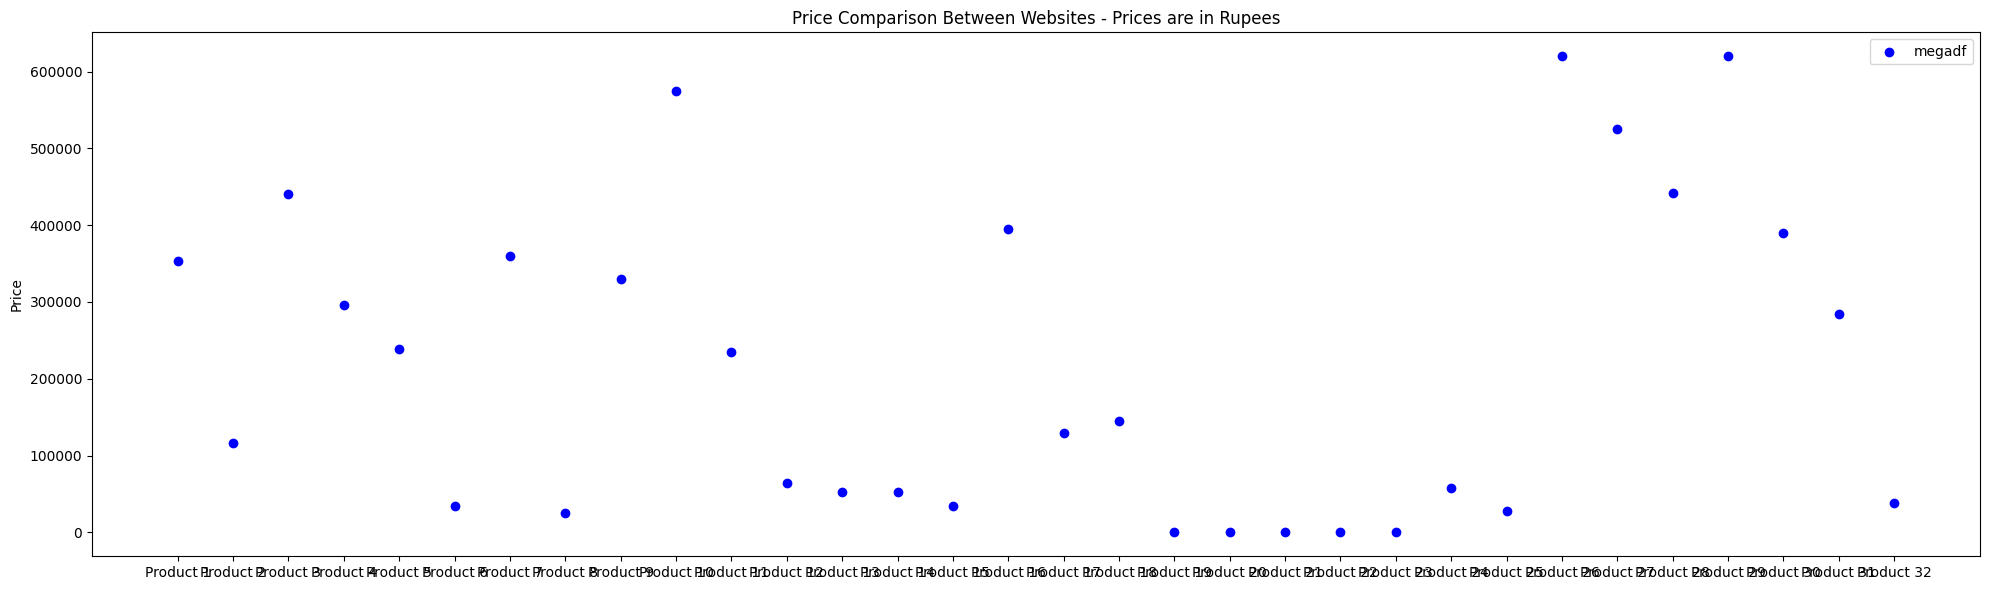

In [180]:
plt.figure(figsize=(20, 6))
plt.scatter(range(len(megadf)), megadf['Price'], label='megadf', marker='o', color='blue')
# plt.scatter(range(len(amazon_df)), amazon_df['Price'], label='amazon_df', marker='x', color='red')
plt.ylabel('Price')
plt.title('Price Comparison Between Websites - Prices are in Rupees')
plt.legend()
plt.xticks(range(len(megadf + amazon_df)), [f'Product {i + 1}' for i in range(len(megadf + amazon_df))])
plt.tight_layout()

plt.show()

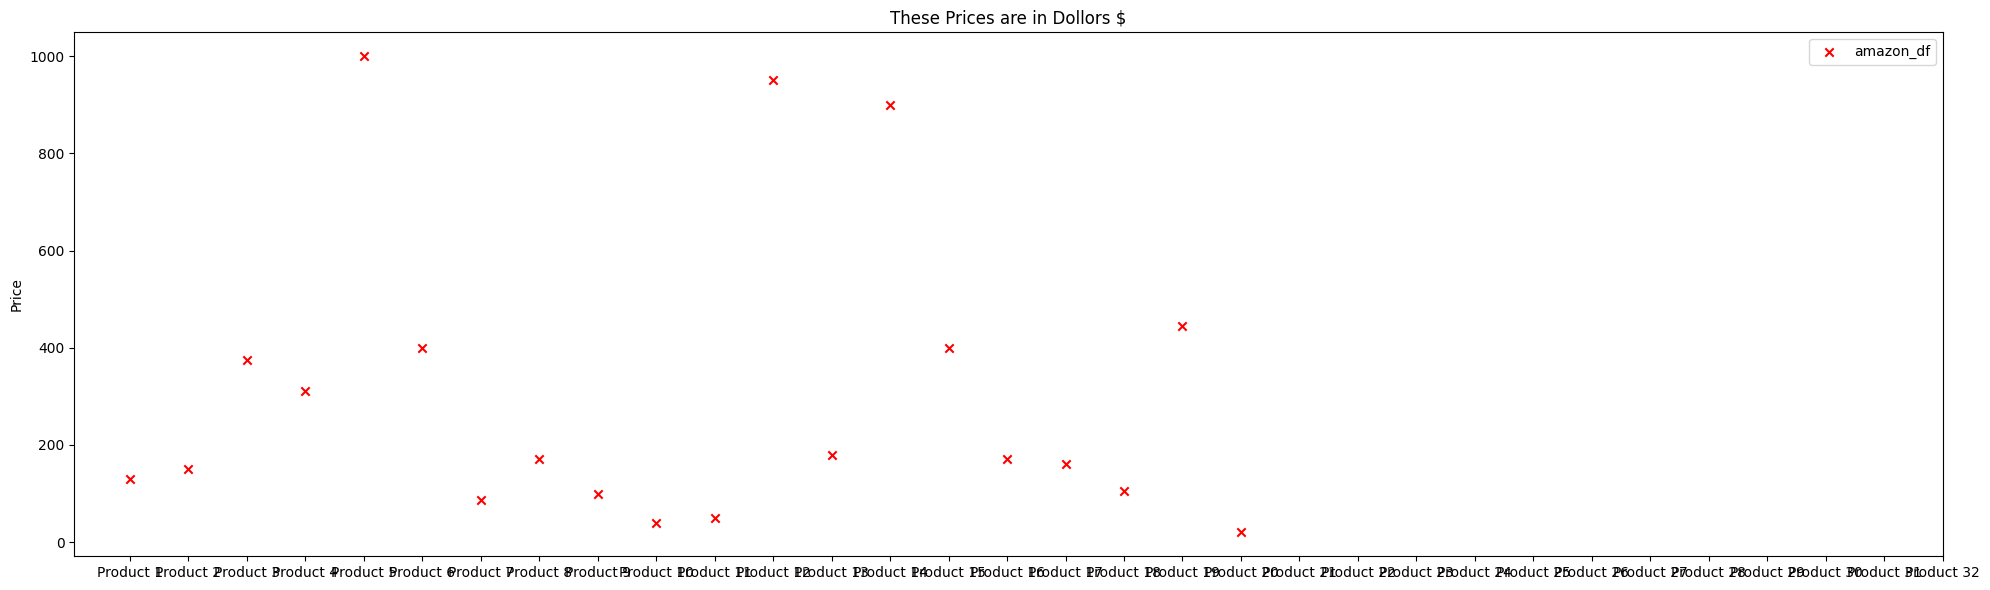

In [179]:
plt.figure(figsize=(20, 6))
# plt.scatter(range(len(megadf)), megadf['Price'], label='megadf', marker='o', color='blue')
plt.scatter(range(len(amazon_df)), amazon_df['Price'], label='amazon_df', marker='x', color='red')
plt.ylabel('Price')
plt.title('These Prices are in Dollors $')
plt.legend()
plt.xticks(range(len(megadf + amazon_df)), [f'Product {i + 1}' for i in range(len(megadf + amazon_df))])
plt.tight_layout()

plt.show()